In [1]:
%matplotlib inline 

import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import datetime
import time

In [2]:
# generate dictionary

path='/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/clean/level_2/numpy/{}/*.npy' #level_2 (1d array for sum stats)

start = 2013; end = 2018
years = range(start, end+1)

flight_dict ={} #empty flight_dict
num_flights = [] #empty list

for year in years:
#     print((year))
    flight_dict[str(year)] = sorted(glob.glob(path.format(year))) #build flight_dicttionary, important to have flight_dict['str']
    
for key, value in flight_dict.items(): 

        num_flights.append(len(value))
        print('number of lidar flights in {}:'.format(key) , len(value))
print('# of flights list:', num_flights)
 
x=(sum([len(flight_dict[x]) for x in flight_dict])) #sum flight_dict[x] by adding the length for each x in flight_dict
print('# of flights total:', x) 

number of lidar flights in 2013: 6
number of lidar flights in 2014: 11
number of lidar flights in 2015: 10
number of lidar flights in 2016: 13
number of lidar flights in 2017: 9
number of lidar flights in 2018: 2
# of flights list: [6, 11, 10, 13, 9, 2]
# of flights total: 51


2013
/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/clean/level_2/numpy/2013/arr_20130403.npy


NameError: name 'isnan' is not defined

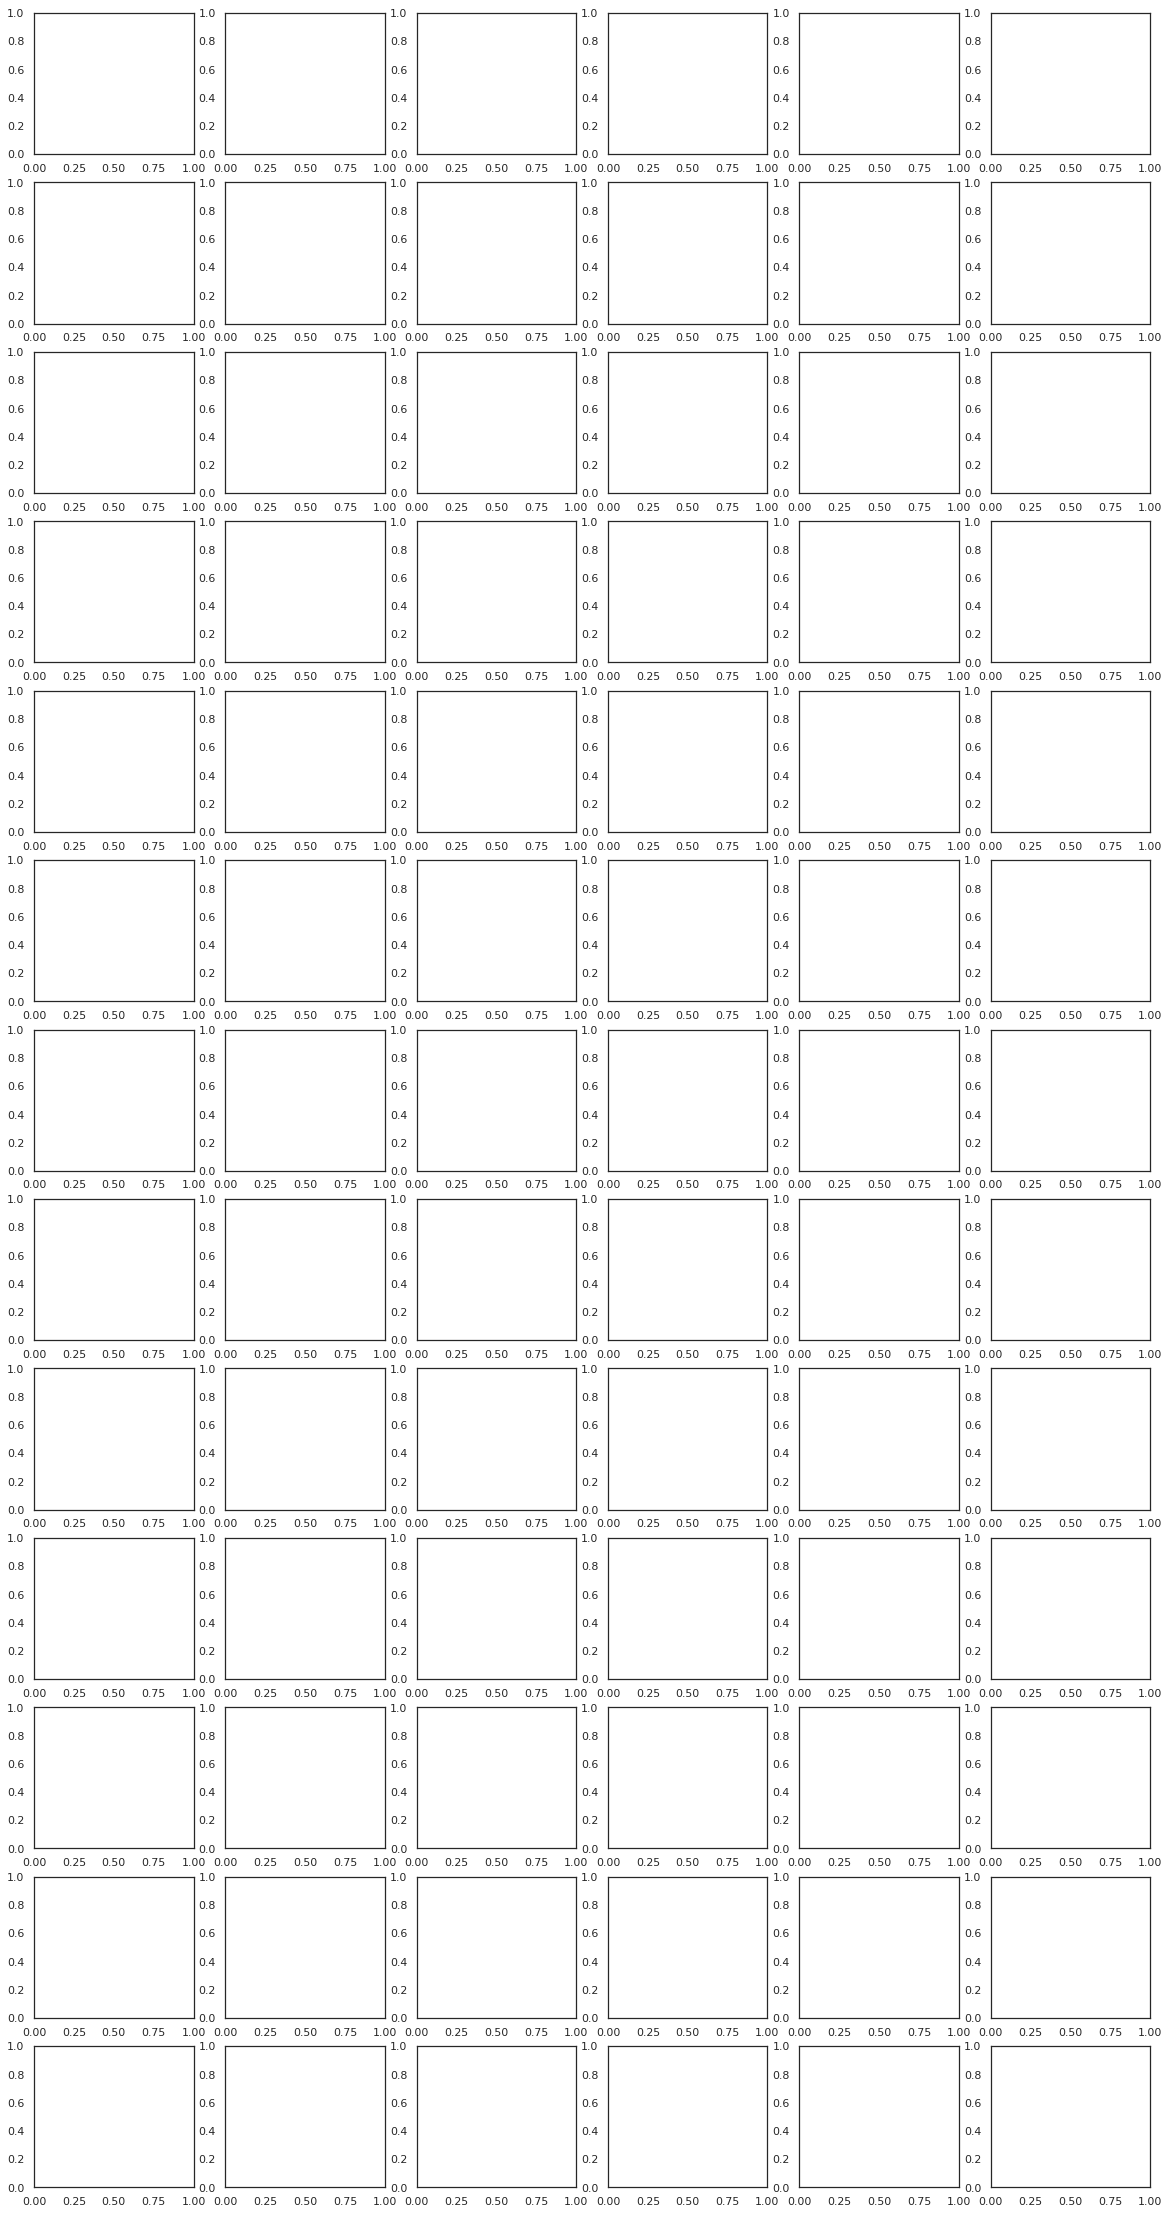

In [7]:
# numpy to dataframe
#and plot it

fig, axs=plt.subplots(nrows=max(num_flights),ncols=len(years), figsize = (20, 40)) #print(axs.shape)
sns.set(style="white", palette="deep", color_codes=True)


for year in years: #loops each year
    print(year)
    flist = glob.glob(path.format(year))
    
    for f in sorted(flist):
        print(f)

        a=np.load(f) #load data array (from the numpy dir)
        df = pd.DataFrame(data=a.flatten(), columns=['SD[m]'], dtype=np.float)
        df=df[~isnan]
        for col in df: 
            sns.kdeplot(df[col], shade=True)
plt.show()